# M3. Computer Vision (24.05.2024), Dr. Aygul Zagidullina

# Introduction to Image Processing

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Loading an Image

We use the [imageio](http://imageio.readthedocs.io) library to read a PNG file that contains a photo of mountains. To display the image, we use [Matplotlib](https://matplotlib.org/).

C:\Users\rotsc\AppData\Local\Temp\ipykernel_5080\3548435252.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_file)


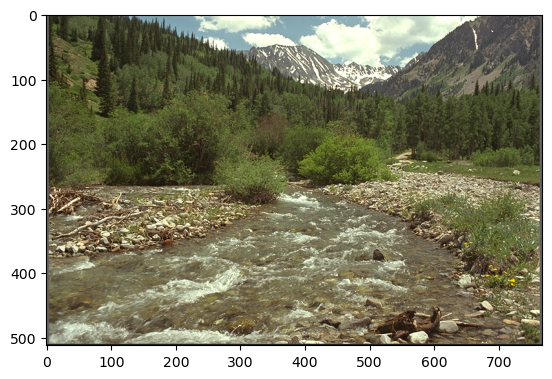

In [29]:
img_file = 'https://r0k.us/graphics/kodak/kodak/kodim13.png'
img = imageio.imread(img_file)

plt.imshow(img)
plt.show()

## Computer Representation of Images

The image is represented as a 3 dimensional array. The dimensions are

- first dimension (axis 0): rows of image pixels (from 0 at the top to 511 at bottom)
- second dimension (axis 1): columns of image pixels (from 0 at the left to 767 at the right)
- third dimension (axis 2): channels of the image (colors, see below)

Each array element is a uint8 (unsigned 8 bit integers), taking a value in the range from 0 to 255. Zero means that the color is absent in the given pixel, and 255 means that the color is at full strength in the pixel.

**Example**:

An image is represented by a **tensor** of size (height, width, channels), where the channels correspond to the RGB (Red, Green, Blue) colors.

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/lectures/deep-learning/03/image_matrix.png" width="500">

In [ ]:
print(f"The image has type: {type(img)}")
print(f"The n-dimensional array (ndarray) with shape: {img.shape}")
print(f"The elements of the ndarray have type: {img.dtype}")

## Plotting the Channels separately

**Question**: What do the different channels represent?

- First dimension: red
- Second dimension: green
- Third dimension: blue

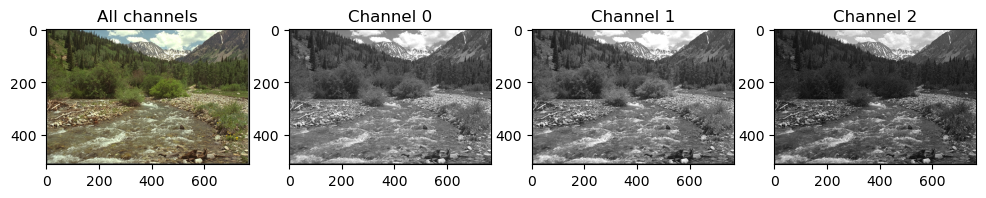

In [31]:
plt.figure(figsize=(12, 3))

ax = plt.subplot(1, 4, 1)
ax.set_title("All channels")
ax.imshow(img)

img_channels = np.split(img, img.shape[2], axis=2)
for i, img_channel in enumerate(img_channels):
  ax = plt.subplot(1, 4, 2 + i)
  ax.set_title(f"Channel {i}")
  ax.imshow(img_channel, cmap='gray')

plt.show()

## Converting Image to Grayscale

For context, see: https://imageio.readthedocs.io/en/v2.4.1/format_iptc-pil.html

When translating a color image to grayscale one can use the luma transform:

L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [ ]:
def to_grayscale(img):
  # Convert channels from integers 0, .., 255 to floating point numbers -1, .., 1
  img_gray = 2 * (img.astype(float) / 255) - 1
  # Separate channels
  img_gray = np.split(img_gray, img_gray.shape[2], axis=2)

  # Convert to grayscale
  img_gray = (
      img_gray[0] * 0.299 +
      img_gray[1] * 0.587 +
      img_gray[2] * 0.114
  )

  # Remove the channel dimension
  img_gray = img_gray[:, :, 0]
  return img_gray

img_gray = to_grayscale(img)
print(f"The grayscale image has shape: {img_gray.shape}")
plt.imshow(img_gray, cmap='gray', vmin=-1, vmax=+1)
plt.show()

## Modifying the Image by adding / multiplying by a Value

 **Question**: What happens when you add / subtract from the image values?

  Change in brightness.

 **Question**: What happens when you multiply / devide the image values?

  Change in contrast.

In [ ]:
def plot_original_and_modified_image(img, img_modified):
  plt.figure(figsize=(8, 5))

  # Original image
  ax = plt.subplot(2, 2, 1)
  ax.set_title("Original")
  ax.set_xlabel("Pixel value")
  ax.set_ylabel("Number of pixels")
  ax.hist(img.reshape(-1), bins=np.linspace(-1, 1, 51), range=(-1, +1))
  hist_ylim = ax.get_ylim()

  ax = plt.subplot(2, 2, 2)
  ax.imshow(img, cmap='gray', vmin=-1, vmax=+1)

  # Modified image
  ax = plt.subplot(2, 2, 3)
  ax.set_title("Modified")
  ax.set_xlabel("Pixel value")
  ax.set_ylabel("Number of pixels")
  ax.hist(img_modified.reshape(-1), bins=np.linspace(-1, 1, 51))
  ax.set_ylim(*hist_ylim)

  ax = plt.subplot(2, 2, 4)
  ax.imshow(img_modified, cmap='gray', vmin=-1, vmax=+1)

  plt.tight_layout()
  plt.show()

# Modify the image
img_modified = img_gray / 2.0
# Make sure that the values stay within -1, .., +1
img_modified = np.clip(img_modified, -1, +1)

plot_original_and_modified_image(img_gray, img_modified)

## Adding and/or removing Noise


In [ ]:
def make_gaussian_filter(*, bandwidth, size):
  filter = np.linspace(-(size - 1) / 2, +(size - 1) / 2, size)
  filter = np.exp(-(
      np.square(filter.reshape(size, 1) / bandwidth) +
      np.square(filter.reshape(1, size) / bandwidth)
  ) / 2) / (2 * np.pi * np.square(bandwidth))
  return filter.reshape(size, size)

# Adding noise to image
img_noisy = img_gray + 0.25 * np.random.normal(size=img_gray.shape)
img_noisy = np.clip(img_noisy, -1, +1)

# Creating Gaussian filter
gauss_filter = make_gaussian_filter(bandwidth=5, size=10)

plt.figure(figsize=(1, 1))
plt.title("Gaussian filter")
plt.imshow(gauss_filter, cmap='gray', vmin=0)
plt.show()

img_filtered = sp.signal.convolve2d(img_noisy, gauss_filter)
plot_original_and_modified_image(img_noisy, img_filtered)